# Algorithm Comparisons
It is worth noting that the more approximations performed the largest the chance that the approximation factor falls into a large outlier. The following tests were performed with a relatively small number of queries but large number of times, then calculating the average max outlier, in order to get a better sense. 

## LSH

### General
For the comparisons between the four algorithms we chose to take as a baseline the performance of LSH, since it is the most popular amogst them and yields fairly good results. 

We already had a good idea as to what the optimal parameters for LSH on the MNIST dataset were from the previous Assignment. Nonetheless, we run a wide range of tests and found a set of parameters that performed a bit more consistenly that the one we were previously using. 

### K, The number of Hyperplanes of the Hashfunctions
We first run LSH with a variable ```K```, leaving all the other variables constant. Increasing the number of the hyperplanes beyond the default value (4) yielded no notable improvments in accuracy, neither any notable increase in time. This means that the new "cuts" in the space don't offer any new information, which of course was what we had noticed from the previous assignment. 

Above (6) hyperplanes, the buckets seem to become sparse, since there were many accounts of K-NN failing to even find ```K``` candidates, let alone good ones. 

Decreasing the number of hyperplanes, increases the accuracy a bit but at a time cost

We performed those tests keeping the values which seemed optimal to us in the first assignment, that is:

* ```L = 5```
* ```Window = 1500```
* ```Table Size = 3750```

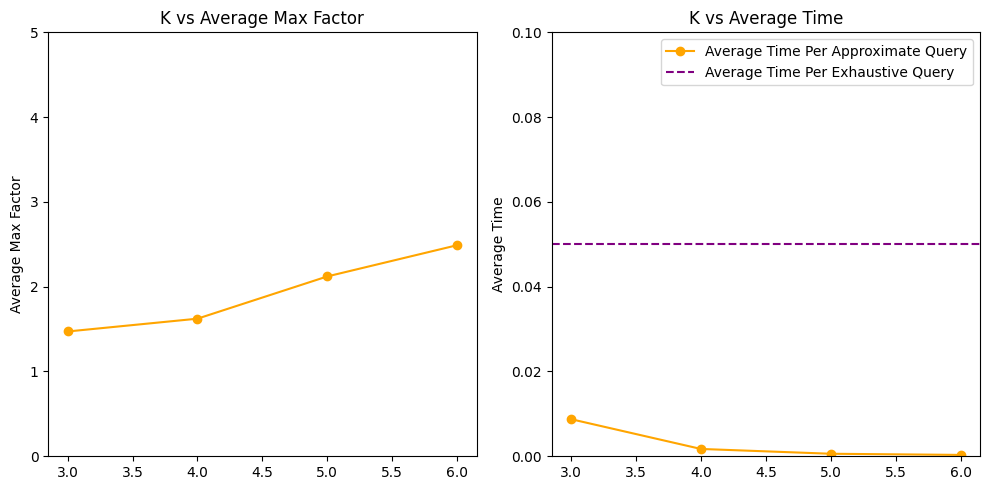

In [89]:
import matplotlib.pyplot as plt

# Data
k_values = [3, 4, 5, 6]
average_max_factor = [1.471744 , 1.622796, 2.121088, 2.489180]
avg_time_approx_query = [0.008750, 0.001730, 0.000596, 0.000323]
avg_time_exhaust_query = 0.05  # Rounded up value for AverageTimePerExhaustQuery

# Creating subplots
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(10, 5))

# Plotting K vs MaxFactor
ax1.plot(k_values, average_max_factor, marker='o', linestyle='-', color='orange')
ax1.set_ylabel('Average Max Factor')
ax1.set_title('K vs Average Max Factor')
ax1.set_ylim(0.0, 5.0)

# Plotting K vs AverageTimePerApproxQuery
ax2.plot(k_values, avg_time_approx_query, marker='o', linestyle='-', color='orange', label='Average Time Per Approximate Query')
ax2.axhline(y=avg_time_exhaust_query, linestyle='--', color='purple', label='Average Time Per Exhaustive Query')
ax2.set_title('K vs Average Time')
ax2.set_ylabel('Average Time')
ax2.set_ylim(0.0, 0.1)
ax2.legend()

# Adjust layout for better spacing
plt.tight_layout()

# Display the subplots
plt.show()

### L, The number of Hashtables
We knew that L is the variable that has the most impact, both in approximation and in time. A large L value essentially simulates an exhaustive search by creating so many hashtables that for every point, they include all possible neighbors. Thus passing through every hashtable which result in calculating every distance from every point to another. 

Again we performed the test for L keeping the values which seemed optimal to us in the first assignment, that is:

* ```K = 4```
* ```Window = 1500```
* ```Table Size = 3750```

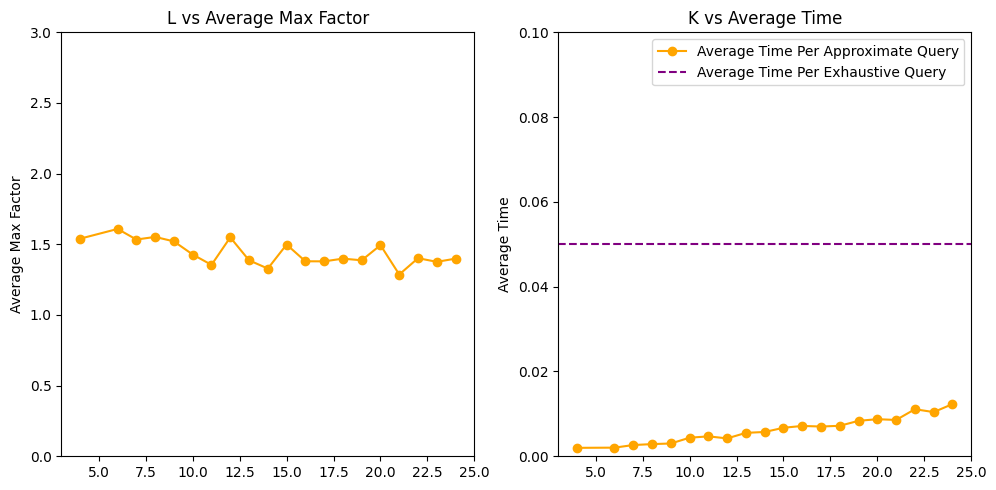

In [90]:
import matplotlib.pyplot as plt

# Data
l_values = [4, 6, 7, 8,
           9, 10, 11,
           12, 13, 14,
           15, 16, 17,
           18, 19, 20,
           21, 22, 23, 24]
average_max_factor = [1.539636, 1.608726, 1.533740, 1.552325, 
                      1.520500, 1.427670, 1.354492, 
                      1.549074, 1.386801, 1.328301, 
                      1.498311, 1.379906, 1.379338, 
                      1.398632, 1.386801, 1.494042, 
                      1.286299, 1.401865,1.375948, 1.398632]

avg_time_approx_query = [0.001990, 0.002036, 0.002650, 0.002873, 
                        0.003015, 0.004382, 0.004696, 
                        0.004219, 0.005524, 0.005734 ,
                        0.006723, 0.007157, 0.007017, 
                        0.007192, 0.008366, 0.008747, 
                        0.008568, 0.011102, 0.010422, 0.012311]
avg_time_exhaust_query = 0.05  # Rounded up value for AverageTimePerExhaustQuery

# Creating subplots
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(10, 5))

# Plotting L vs AverageMaxFactor
ax1.plot(l_values, average_max_factor, marker='o', linestyle='-', color='orange')
ax1.set_ylabel('Average Max Factor')
ax1.set_title('L vs Average Max Factor')
ax1.set_ylim(0.0, 3)

# Plotting K vs AverageTimePerApproxQuery
ax2.plot(l_values, avg_time_approx_query, marker='o', linestyle='-', color='orange', label='Average Time Per Approximate Query')
ax2.axhline(y=avg_time_exhaust_query, linestyle='--', color='purple', label='Average Time Per Exhaustive Query')
ax2.set_title('K vs Average Time')
ax2.set_ylabel('Average Time')
ax2.set_ylim(0.0, 0.1)
ax2.legend()

# Adjust layout for better spacing
plt.tight_layout()

# Display the subplots
plt.show()

### W, The size of the window of the Hyperplane function
This value we had experimentally learned that it was very important, it was the difference between filling up the buckets with good approximations or not at all. There were plenty of times that we weren't getting any results because of a very low ```W``` value. We had learned that the optimal for our implementation, as well as the MNIST dataset was somewhere around ~1400.

* ```L = 5```
* ```K = 4```
* ```Table Size = 3750```

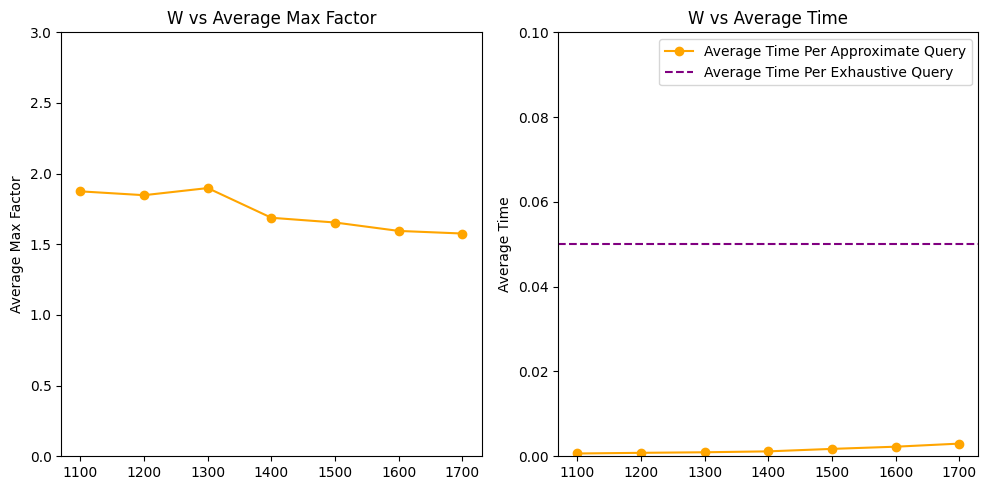

In [91]:
import matplotlib.pyplot as plt

# Data
w_values = [1100, 1200, 1300, 1400, 1500, 1600, 1700]
average_max_factor = [1.874702, 1.847554, 1.897954, 1.687699, 
                      1.654199, 1.594703, 1.576260]

avg_time_approx_query = [0.000657, 0.000813, 0.000943, 0.001161, 
                        0.001743, 0.002259, 0.002990]

avg_time_exhaust_query = 0.05  # Rounded up value for AverageTimePerExhaustQuery

# Creating subplots
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(10, 5))

# Plotting W vs MaxFactor
ax1.plot(w_values , average_max_factor, marker='o', linestyle='-', color='orange')
ax1.set_ylabel('Average Max Factor')
ax1.set_title('W vs Average Max Factor')
ax1.set_ylim(0.0, 3)

# Plotting K vs AverageTimePerApproxQuery
ax2.plot(w_values, avg_time_approx_query, marker='o', linestyle='-', color='orange', label='Average Time Per Approximate Query')
ax2.axhline(y=avg_time_exhaust_query, linestyle='--', color='purple', label='Average Time Per Exhaustive Query')
ax2.set_title('W vs Average Time')
ax2.set_ylabel('Average Time')
ax2.set_ylim(0.0, 0.1)
ax2.legend()

# Adjust layout for better spacing
plt.tight_layout()

# Display the subplots
plt.show()

### Table Size, i.e. the number of buckets of each Hashtable
This value is given as ```SizeOfDataset/2^n``` . Of course we quickly rejected the really large values.
Again the test were run with the rest of the variables constant:

* ```L = 5```
* ```K = 4```
* ```W = 1500```

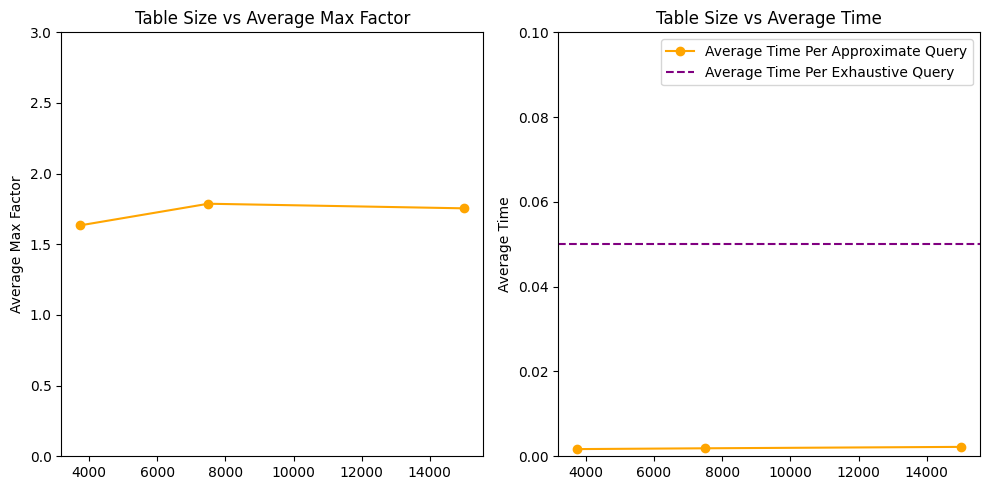

In [92]:
import matplotlib.pyplot as plt

# Data
t_values = [3750, 7500, 15000]

average_max_factor = [1.634417, 1.787140, 1.754569]

avg_time_approx_query = [0.001695, 0.001883, 0.002216]

avg_time_exhaust_query = 0.05  # Rounded up value for AverageTimePerExhaustQuery

# Creating subplots
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(10, 5))

# Plotting W vs MaxFactor
ax1.plot(t_values , average_max_factor, marker='o', linestyle='-', color='orange')
ax1.set_ylabel('Average Max Factor')
ax1.set_title('Table Size vs Average Max Factor')
ax1.set_ylim(0.0, 3)

# Plotting K vs AverageTimePerApproxQuery
ax2.plot(t_values, avg_time_approx_query, marker='o', linestyle='-', color='orange', label='Average Time Per Approximate Query')
ax2.axhline(y=avg_time_exhaust_query, linestyle='--', color='purple', label='Average Time Per Exhaustive Query')
ax2.set_title('Table Size vs Average Time')
ax2.set_ylabel('Average Time')
ax2.set_ylim(0.0, 0.1)
ax2.legend()

# Adjust layout for better spacing
plt.tight_layout()

# Display the subplots
plt.show()

### Finding the optimal combination
We run many tests, where we fed the program random parameters from a certain pool of parameters that we though to be within the optimal range. Then we took our optimal parameters and tested them for the actual max factor (not the average of many tries), to make sure that even our worst outlier was approximated good enough (i.e. our max approximation factor was less than ```2``` at all times).

Below the results of our "stress test" are shown. As you can see, you'd need to run more than ```5000``` queries in a row for a strong a enough chance that just one of them will over-approximate the nearest neighbor by a factor of ```2```. And all that achieved with only a ```0.0016 seconds/query```, in contrast with the brute force ```0.05 seconds/query``` (~32 times faster).

The tests below were run for the values: 

* ```L = 6```
* ```K = 4```
* ```W = 1400```
* ```TableSize = 7500```

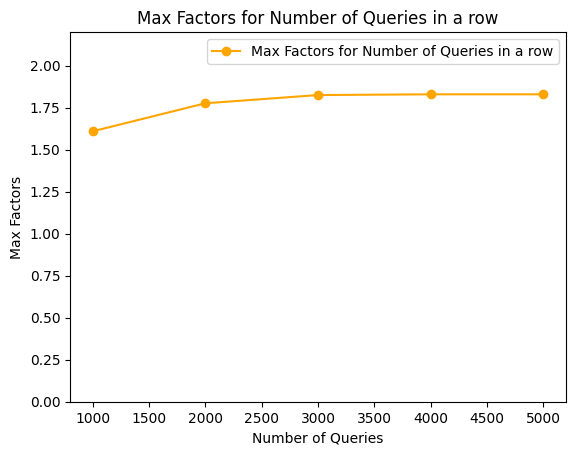

In [93]:
import matplotlib.pyplot as plt

# Data
q_values = [1000, 2000, 3000, 4000, 5000]
max_factors = [1.609474, 1.776416, 1.825386, 1.829789, 1.829789]

plt.plot(q_values, max_factors, marker='o', linestyle='-', color='orange', label='Max Factors for Number of Queries in a row')


# Adding labels and title
plt.xlabel('Number of Queries')
plt.ylabel('Max Factors')
plt.ylim(0.0, 2.2)
plt.title('Max Factors for Number of Queries in a row')

# Adding legend
plt.legend()

# Display the graph
plt.show()


## Hypercube

### General
Having LSH as a baseline we will try to find the best parameters of the Hypercube that immitate the results of LSH.
Also based on our empirical knowledge of how the algorithm performs, we have formed a set of default values as the based testing ground of each parameter alone.

### K, the dimensions of the Hypercube
We obviously don't want to dimensions to be too low, since that would mean that there are not enough buckets to adequetly differentiate between the datapoints. Of course the more dimensions the most accurate our approximations, but that also depends on the rest of parameters. 

Thinking of the edge cases, it's easy to see that for low dimensions we would need a high M parameter (that is the number of elemets we are allowed to check) but we could get away with relatively low probes (the amount of neighboring vertices we are allowed to visit) since the hypercube verteces/buckets would contain many elements.

On the other hand, thinking of a case where each bucket/vertex only holds one datapoint (i.e. high dimensionality hypercube), we would need as many probes as number of elements that we are allowed to check, and we could possibly get away with only checking just a bit more than the specified amount of our KNN and get a very good approximation. This of course has the disadvantage of being extremely slow.

For the test, the rest of parameters are set to:

* ```Probes = 500```
* ```M = 3000```

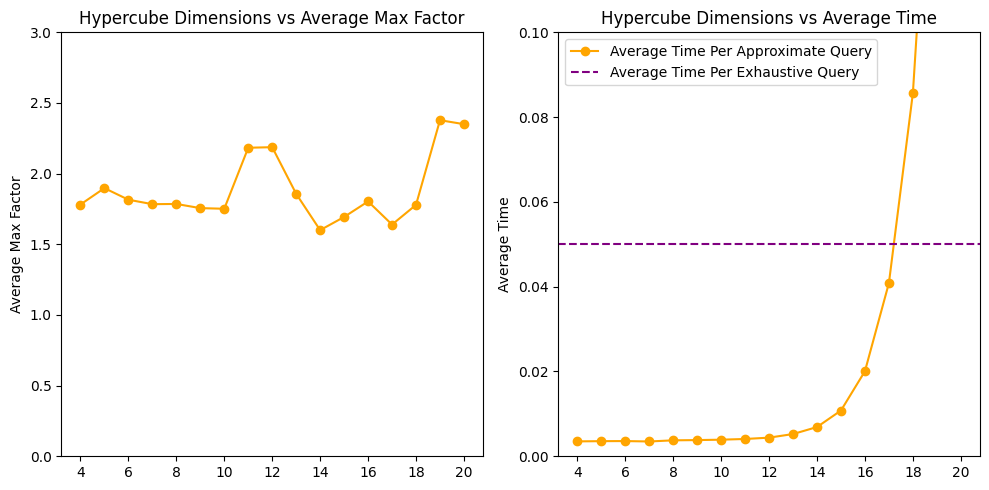

In [94]:
import matplotlib.pyplot as plt

# Data
d_values = [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

average_max_factor = [1.781571, 1.897560, 1.815552,
                     1.783970, 1.785543, 1.756016,
                     1.751543, 2.183270, 2.187275,
                     1.857252, 1.600198, 1.693489,
                     1.803272, 1.639706, 1.779065, 
                     2.378280, 2.350163]
                     

avg_time_approx_query = [0.003513, 0.003566, 0.003587,
                        0.003490, 0.003762, 0.003818,
                        0.003915, 0.004081, 0.004395,
                        0.005246, 0.006897, 0.010798,
                        0.020070, 0.040863, 0.085677,
                        0.174784, 0.395295]

avg_time_exhaust_query = 0.05  # Rounded up value for AverageTimePerExhaustQuery

# Creating subplots
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(10, 5))

# Plotting Hypercube Dimensions vs MaxFactor
ax1.plot(d_values , average_max_factor, marker='o', linestyle='-', color='orange')
ax1.set_ylabel('Average Max Factor')
ax1.set_title('Hypercube Dimensions vs Average Max Factor') 
ax1.set_ylim(0.0, 3)

# Plotting Hypercube Dimensions vs AverageTimePerApproxQuery
ax2.plot(d_values , avg_time_approx_query, marker='o', linestyle='-', color='orange', label='Average Time Per Approximate Query')
ax2.axhline(y=avg_time_exhaust_query, linestyle='--', color='purple', label='Average Time Per Exhaustive Query')
ax2.set_title('Hypercube Dimensions vs Average Time')
ax2.set_ylabel('Average Time')
ax2.set_ylim(0.0, 0.1)
ax2.legend()

# Adjust layout for better spacing
plt.tight_layout()

# Display the subplots
plt.show()

### Probes
There is nothing much to say about the probes, other than the fact the higher dimensions require more probes to reap their full potential. The peculiar thing about those particular parameters of the hypercube is that they all forego the natural rules of the structure and instead represent parameters that are intuitive for us to think of, but at the cost of being disconnected with the problem itself. 

This fact is also demonstrated in our implementation of the Hypercube, where the parameter ```probes``` is turn into the much more seemless ```MaxHammingDistance``` which neatly corresponds with the structure of the hypercube itself, in contrast with the parameter ```probes```, carries no direct information about how far you are allowed to strafe from the initial vertex/bucket. 

For the test, the rest of parameters are set to:

* ```K = 14```
* ```M = 3000```

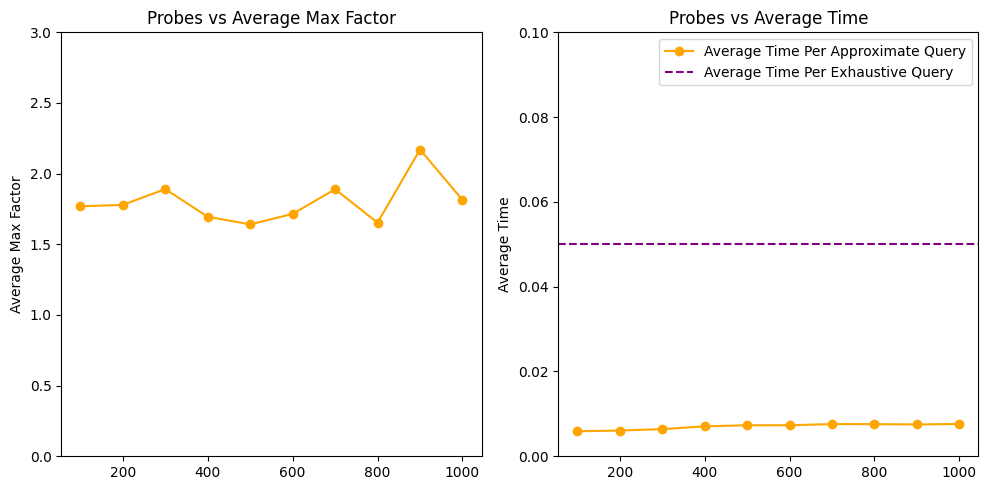

In [95]:
import matplotlib.pyplot as plt

# Data
probes = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

average_max_factor = [1.768997, 1.779157, 1.890779, 
                      1.694862, 1.640906, 1.715138, 
                      1.889804, 1.653218, 2.170528, 1.814346]
                     

avg_time_approx_query = [0.005897,  0.006073, 0.006405,
                         0.007055, 0.007314, 0.007318, 
                         0.007593, 0.007575, 0.007505, 0.007625]
                       

avg_time_exhaust_query = 0.05  # Rounded up value for AverageTimePerExhaustQuery

# Creating subplots
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(10, 5))

# Plotting Probes vs MaxFactor
ax1.plot(probes , average_max_factor, marker='o', linestyle='-', color='orange')
ax1.set_ylabel('Average Max Factor')
ax1.set_title('Probes vs Average Max Factor') 
ax1.set_ylim(0.0, 3)

# Plotting Probes vs AverageTimePerApproxQuery
ax2.plot(probes , avg_time_approx_query, marker='o', linestyle='-', color='orange', label='Average Time Per Approximate Query')
ax2.axhline(y=avg_time_exhaust_query, linestyle='--', color='purple', label='Average Time Per Exhaustive Query')
ax2.set_title('Probes vs Average Time')
ax2.set_ylabel('Average Time')
ax2.set_ylim(0.0, 0.1)
ax2.legend()

# Adjust layout for better spacing
plt.tight_layout()

# Display the subplots
plt.show()

### M (number of elements allowed to check)
```M``` is probably the least impressive of all the parameters. It's an entirely artificial parameter that only serves the purpose of forcibly stopping the search once a certain number of elements have been checked. Unlike the ```probes``` parameter which at least can be mapped to a certain hamming distance given a hypercube of set dimensions, ```M``` lacks even this type of correspondance. 

Nonetheless, it is indeed helpful as an easy to calibrate the speed/accuracy tradeoff.
The following is how the algorithm performs for different ```M``` values given our favourite values of the rest of the parameters:

* ```K = 14```
* ```Probes = 500```

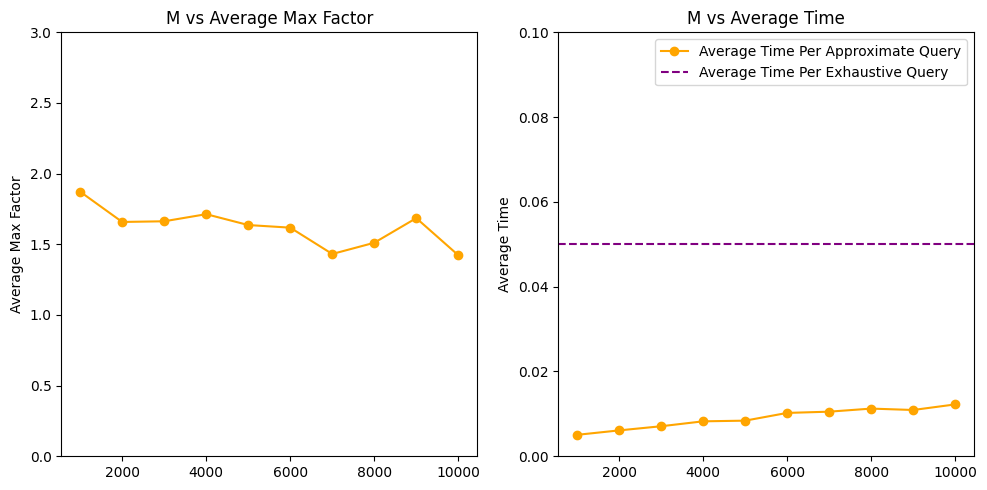

In [96]:
import matplotlib.pyplot as plt

# Data
m_values = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]

average_max_factor = [1.872135, 1.658151, 1.662908, 
                      1.713200, 1.636283, 1.617843, 
                      1.431540, 1.510946, 1.685272, 1.422722]
                     

avg_time_approx_query = [0.005057,  0.006104, 0.007083,
                         0.008243, 0.008402, 0.010227, 
                         0.010521, 0.011248, 0.010918, 0.012233]
                       

avg_time_exhaust_query = 0.05  # Rounded up value for AverageTimePerExhaustQuery

# Creating subplots
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(10, 5))

# Plotting M vs MaxFactor
ax1.plot(m_values , average_max_factor, marker='o', linestyle='-', color='orange')
ax1.set_ylabel('Average Max Factor')
ax1.set_title('M vs Average Max Factor') 
ax1.set_ylim(0.0, 3)

# Plotting M vs AverageTimePerApproxQuery
ax2.plot(m_values , avg_time_approx_query, marker='o', linestyle='-', color='orange', label='Average Time Per Approximate Query')
ax2.axhline(y=avg_time_exhaust_query, linestyle='--', color='purple', label='Average Time Per Exhaustive Query')
ax2.set_title('M vs Average Time')
ax2.set_ylabel('Average Time')
ax2.set_ylim(0.0, 0.1)
ax2.legend()

# Adjust layout for better spacing
plt.tight_layout()

# Display the subplots
plt.show()

### Finding the optimal combination
The Hypercube becomes slow when trying to immitate the accuracy of LSH but nonetheless we found a parameter combination that was accurate without compromising the querying speed too much. 
Specifically the time per query that Hypercube needs to achieve consistent worst case approximations less than a factor of ```2``` is ```0.0051 seconds/query``` (~10 less than brute force).

Those parameters are:

* ```K = 11```
* ```Probes = 6000```
* ```M = 4000```

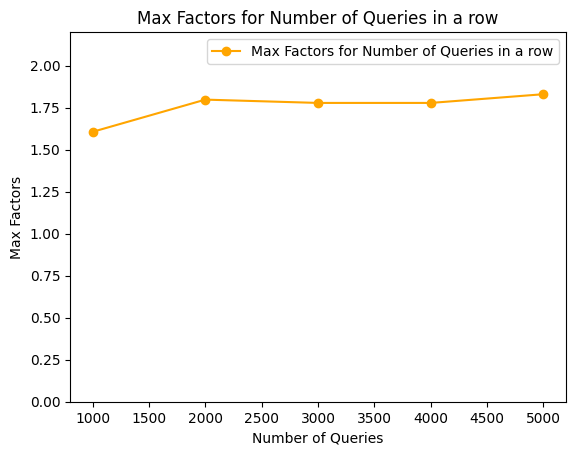

In [97]:
import matplotlib.pyplot as plt

# Data
q_values = [1000, 2000, 3000, 4000, 5000]
max_factors = [1.606468, 1.798223, 1.778564, 1.778564, 1.830460]

plt.plot(q_values, max_factors, marker='o', linestyle='-', color='orange', label='Max Factors for Number of Queries in a row')


# Adding labels and title
plt.xlabel('Number of Queries')
plt.ylabel('Max Factors')
plt.ylim(0.0, 2.2)
plt.title('Max Factors for Number of Queries in a row')

# Adding legend
plt.legend()

# Display the graph
plt.show()

## GNNS
### General
Initially we were suprised at the performance of GNNS, since it had the ability to give better results than LSH, with fast querying speed as well. It was when we started running some more thorough tests that we realized that GNNS had the capacity to be very innacurate, yielding some terrible approximations.

That wouldn't have been a problem if we were able to make GNNS perform well at less of a cost, but in fact making GNNS be as accurate as LSH with a reasonable query speed proved to be a very ambitious task. 

In the tests below, we will be using LSH to fill up the index. After finding parameters that appear optimal, we will compare the two initialization methods of LSH and Hypercube, using their optimal parameters, to see if there will be any visible difference in the performance of GNNS.

### R (Random Restarts)
This parameter is basically acts as a de-randomizer. That's because GNNS relies on a random starting node, which can throw off the whole search by a lot in some cases. Giving it many restarts increases the chances that this random node will sooner or later end up in the correct "neighborhood", as it were. 

That of course comes with a price; since the random restarts in a sense restart the GNNS algorithm, they can end up slowing it down by a lot. 

Below is the impact of the ```R``` parameter keeping the rest of the parameters at a modest level. Notice that average time of a query is analogus to the number of random restarts; when the latter is doubled the first one is doubled as well. This is exactly the behavior we expected. 

* ```k = 20```
* ```greedySteps = 10```
* ```E = 10```

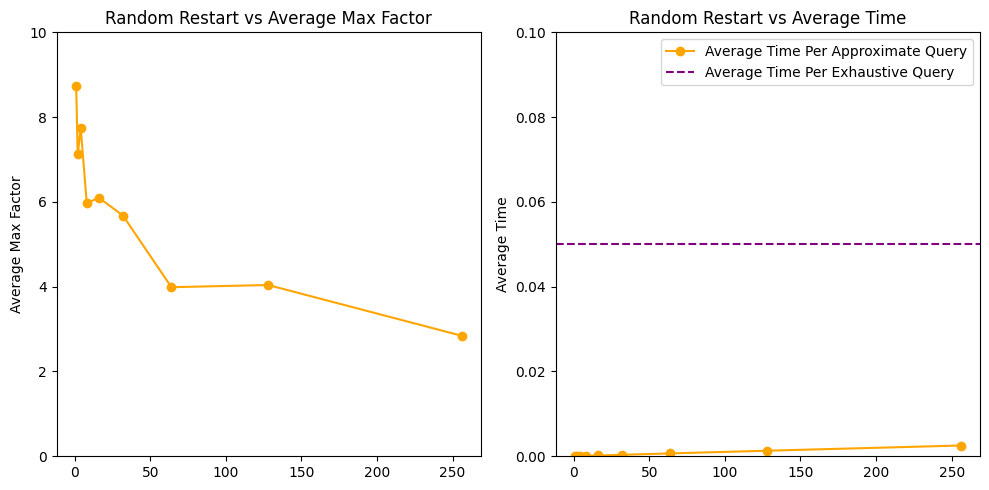

In [98]:
import matplotlib.pyplot as plt

# Data
r_values = [1, 2, 4, 8, 16, 32, 64, 128, 256]

average_max_factor = [8.744791, 7.122355, 7.741301, 
                      5.968636, 6.099923, 5.674657, 
                      3.988391, 4.039640, 2.842928]
                     

avg_time_approx_query = [0.000018,  0.000031, 0.000056,
                         0.000100, 0.000185, 0.000352, 
                         0.000674, 0.001310, 0.002540]
                       

avg_time_exhaust_query = 0.05  # Rounded up value for AverageTimePerExhaustQuery

# Creating subplots
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(10, 5))

# Plotting RandomRestarts vs MaxFactor
ax1.plot(r_values , average_max_factor, marker='o', linestyle='-', color='orange')
ax1.set_ylabel('Average Max Factor')
ax1.set_title('Random Restart vs Average Max Factor') 
ax1.set_ylim(0.0, 10)

# Plotting RandomRestarts vs AverageTimePerApproxQuery
ax2.plot(r_values , avg_time_approx_query, marker='o', linestyle='-', color='orange', label='Average Time Per Approximate Query')
ax2.axhline(y=avg_time_exhaust_query, linestyle='--', color='purple', label='Average Time Per Exhaustive Query')
ax2.set_title('Random Restart vs Average Time')
ax2.set_ylabel('Average Time')
ax2.set_ylim(0.0, 0.1)
ax2.legend()

# Adjust layout for better spacing
plt.tight_layout()

# Display the subplots
plt.show()

### k (Max outdegree)
Since the index is initialized with approximate methods, which are not particularly accurate given the task of a large "K" in the KNN. That's why we restricted the ```k``` values to a pool of relatively small numbers.

* ```R = 100```
* ```greedySteps = 10```
* ```E = 10```

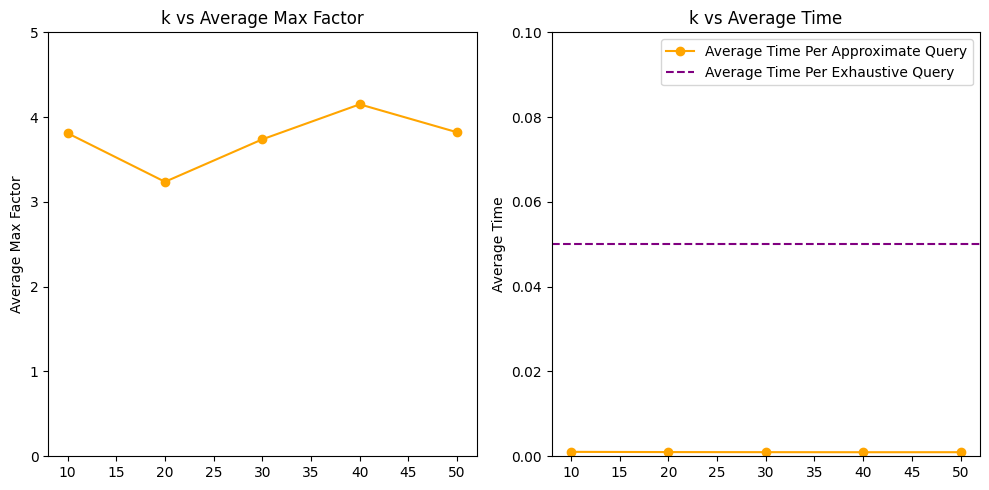

In [99]:
import matplotlib.pyplot as plt

# Data
k_values = [10, 20, 30, 40, 50]

average_max_factor = [3.810412, 3.237125, 3.738211, 
                      4.150949,  3.82127]
                     

avg_time_approx_query = [0.001041,  0.000990, 0.000971,
                         0.000956, 0.000961]
                       

avg_time_exhaust_query = 0.05  # Rounded up value for AverageTimePerExhaustQuery

# Creating subplots
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(10, 5))

# Plotting k vs MaxFactor
ax1.plot(k_values , average_max_factor, marker='o', linestyle='-', color='orange')
ax1.set_ylabel('Average Max Factor')
ax1.set_title('k vs Average Max Factor') 
ax1.set_ylim(0.0, 5)

# Plotting k vs AverageTimePerApproxQuery
ax2.plot(k_values , avg_time_approx_query, marker='o', linestyle='-', color='orange', label='Average Time Per Approximate Query')
ax2.axhline(y=avg_time_exhaust_query, linestyle='--', color='purple', label='Average Time Per Exhaustive Query')
ax2.set_title('k vs Average Time')
ax2.set_ylabel('Average Time')
ax2.set_ylim(0.0, 0.1)
ax2.legend()

# Adjust layout for better spacing
plt.tight_layout()

# Display the subplots
plt.show()

### E (Expansions)
This parameter determines how many of those out edges we will be using to find. Since we are in control of both ```k``` and ```E```, we could easily omit this parameter and just use every out edge in our search, calibrating the ```k``` parameter accordingly instead. For the sake of consistency, we have included the results of KNN with varying ```E```, using the max ```k``` from our previous test, to further demonstrate this correspondance. 

* ```R = 100```
* ```k = 50```
* ```greedySteps = 10```

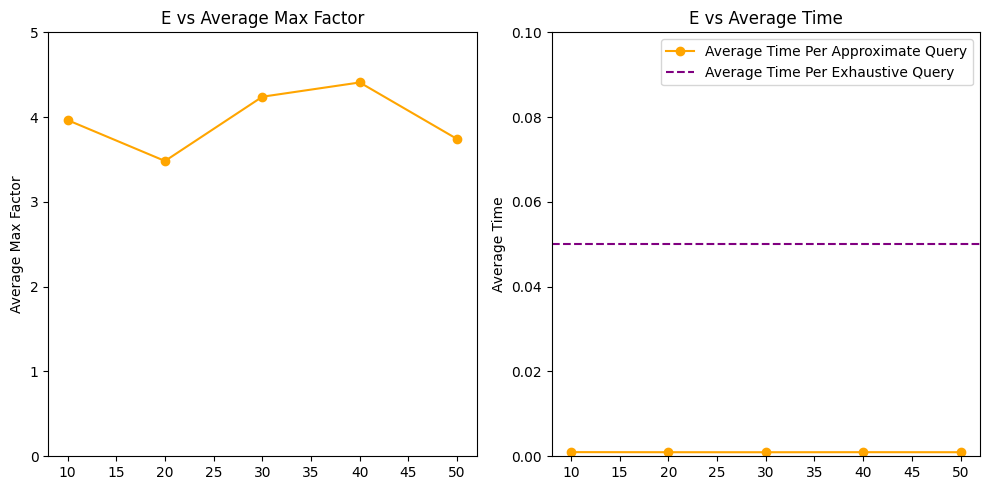

In [100]:
import matplotlib.pyplot as plt

# Data
e_values = [10, 20, 30, 40, 50]

average_max_factor = [3.964766, 3.482643, 4.240541, 
                      4.408812,  3.741932]
                     

avg_time_approx_query = [0.000979,  0.000958, 0.000951,
                         0.000965, 0.000956]
                       

avg_time_exhaust_query = 0.05  # Rounded up value for AverageTimePerExhaustQuery

# Creating subplots
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(10, 5))

# Plotting E vs MaxFactor
ax1.plot(e_values , average_max_factor, marker='o', linestyle='-', color='orange')
ax1.set_ylabel('Average Max Factor')
ax1.set_title('E vs Average Max Factor') 
ax1.set_ylim(0.0, 5)

# Plotting E vs AverageTimePerApproxQuery
ax2.plot(e_values , avg_time_approx_query, marker='o', linestyle='-', color='orange', label='Average Time Per Approximate Query')
ax2.axhline(y=avg_time_exhaust_query, linestyle='--', color='purple', label='Average Time Per Exhaustive Query')
ax2.set_title('E vs Average Time')
ax2.set_ylabel('Average Time')
ax2.set_ylim(0.0, 0.1)
ax2.legend()

# Adjust layout for better spacing
plt.tight_layout()

# Display the subplots
plt.show()

### G (Greedy Steps)
This parameter controls how many steps we will take from our initial node. Initially, the only canidates for our KNN are the direct neighbors of our initial **random** node, which is not ideal. ```G``` allows us to find better suited candidates by letting us take ```G``` steps in the (greedy) "right" direction, *id est* it allows us to jump to the node that is "closest" to our query node.

The thing is, it doesn't seem to be doing its job very well, maybe because of the Eucledian metric, or maybe because the approximate methods don't make a good enough graph. It slows the down the queries without offering any improvements in our approximations.

* ```k = 20```
* ```R = 100```
* ```E = 20```

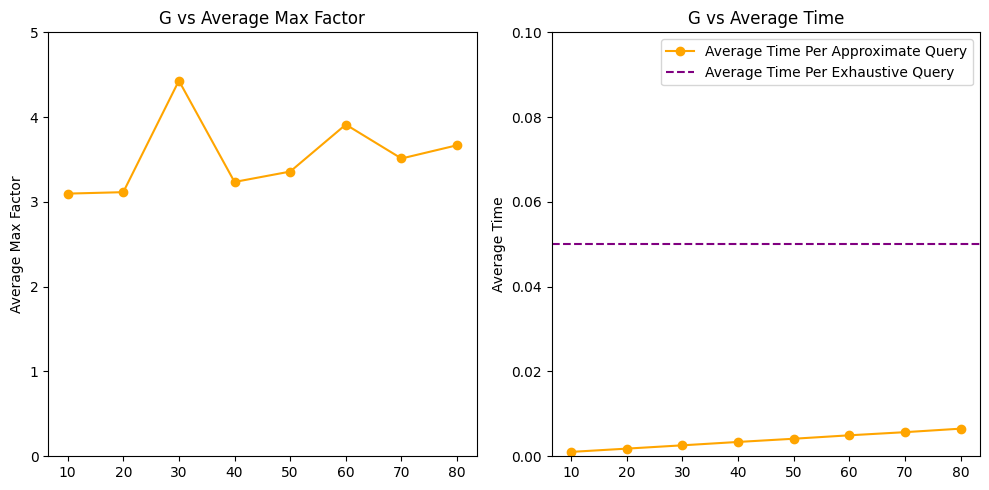

In [101]:
import matplotlib.pyplot as plt

# Data
g_values = [10, 20, 30, 40, 50, 60, 70, 80]

average_max_factor = [3.097887, 3.114895, 4.429658, 3.235253,
                      3.357861,  3.912307, 3.511993, 3.668267]
                     

avg_time_approx_query = [0.001032,  0.001804, 0.002584, 0.003379,
                         0.004136, 0.004946, 0.005685, 0.006513]
                       

avg_time_exhaust_query = 0.05  # Rounded up value for AverageTimePerExhaustQuery

# Creating subplots
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(10, 5))

# Plotting G vs MaxFactor
ax1.plot(g_values , average_max_factor, marker='o', linestyle='-', color='orange')
ax1.set_ylabel('Average Max Factor')
ax1.set_title('G vs Average Max Factor') 
ax1.set_ylim(0.0, 5)

# Plotting G vs AverageTimePerApproxQuery
ax2.plot(g_values , avg_time_approx_query, marker='o', linestyle='-', color='orange', label='Average Time Per Approximate Query')
ax2.axhline(y=avg_time_exhaust_query, linestyle='--', color='purple', label='Average Time Per Exhaustive Query')
ax2.set_title('G vs Average Time')
ax2.set_ylabel('Average Time')
ax2.set_ylim(0.0, 0.1)
ax2.legend()

# Adjust layout for better spacing
plt.tight_layout()

# Display the subplots
plt.show()

### Finding the optimal combination
It should be obvious by now that GNNS is a bit volatile when it comes to approximations. No matter what we tried, we couldn't get it to match LSH's accuracy without querying times that match those of the brute force, and that's without including the double overhead of the approximate method (LSH/Hypercube) and the initialization of the graph index. 

Nonetheless, as expected, LSH seems to create a better graph than Hypercube, as showcased by the comparison below.

As for the quality of the approximation, we ended up searching for an appropriate time, rather than a good worst case approximation, which always exceeded ```2``` in our tests. Considering the heavy overhead of the method, we settled for a time per query that's ~10 times faster than brute force, similar to Hypercube.

* ```K = 100```
* ```R = 400```
* ```E = 100```
* ```G = 10```

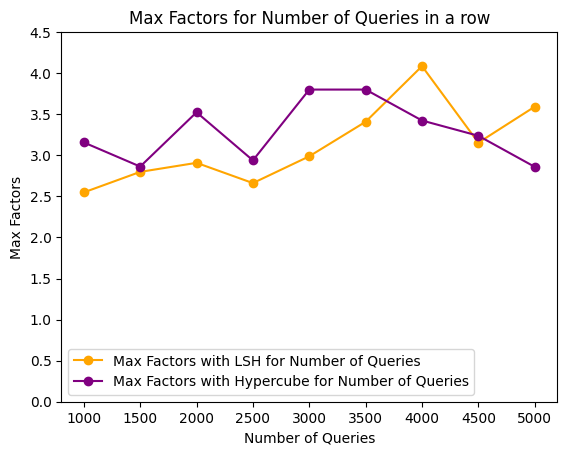

In [102]:
import matplotlib.pyplot as plt

# Data
q_values = [1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]

lsh_max_factors = [2.548782, 2.798385, 2.908510, 
                   2.661825, 2.988150, 3.408704, 
                   4.085710, 3.153726, 3.592235]

cube_max_factors = [3.156992, 2.863029, 3.523828, 
                    2.938449, 3.800552, 3.800552, 
                    3.423761, 3.237893, 2.859710]

plt.plot(q_values, lsh_max_factors, marker='o', linestyle='-', color='orange', label='Max Factors with LSH for Number of Queries')
plt.plot(q_values, cube_max_factors , marker='o', linestyle='-', color='purple', label='Max Factors with Hypercube for Number of Queries')


# Adding labels and title
plt.xlabel('Number of Queries')
plt.ylabel('Max Factors')
plt.ylim(0.0, 4.5)
plt.title('Max Factors for Number of Queries in a row')

# Adding legend
plt.legend()

# Display the graph
plt.show()

## MRNG

### General 
The search that we've been tasked to implement for our Monotonic Relative Neighborhood Graphs, basically only takes one parameter, similar to to the ```M``` parameter of our Hypercube; the number of nodes we are allowed to check before we stop the algorithm.

Of course the meat of this algorithm is the initialization, in creating monotonic "graph paths" as it were. This is also the most expensive step, the initialization being quite slow for large datasets. Thus we decided to initilize it with only half of the MNIST dataset in our tests. 

### l (Size of candate set)

This parameter is very straight forward. Again, just like we saw with ```M``` parameter in the Hypercube, the ```l``` parameter serves as direct way to calibrate the accuracy/speed tradeoff. Because we were working with a reduced version of the set, we shifted into thinking more about the ratio of ```l/SizeOfDataset``` than absolute numbers. 

The speed we were looking for per query, was no more than the concession that was forced upon us in the previous methods (Hypercube/GNNS), meaning no less than a ~10 times speedup from the brute force.

While MRNG displayed a better behaviour than GNNS, it is still lacking (as far as handling the worst case goes) in comparison to the Hypercube and of course, the star of the show, LSH. 

### Finding the optimal combination
There wasn't much to this other than testing for different values of ```l```. Below are the results of our tests. And since this is only one parameter, we could afford to directly test for max approximation factors, rather than taking the average of many attempts.

The way we approached it was straight forward. We pushed the ```l``` as far as it would go without resulting a speedup that was less that the factor of ~10 of the brute force, for this given dataset.

The ```l``` value we settled on was ```l = 200``` which is roughly ```0.7%``` of the size of the dataset. Of course since ```l``` results in an absolute increase in querying time, this percentage will not be optimal in datasets much smaller or much larger than ```60000``` but it may be a good baseline.

The speed needed, for the below accuracies showcased below, is ```0.0060 seconds/query```.

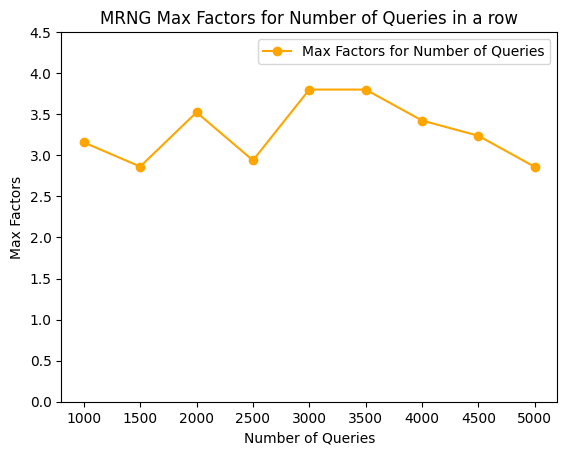

In [103]:
import matplotlib.pyplot as plt

# Data
l_values = [1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]

max_factors = [2.818301, 2.648803, 3.150275, 
                   2.773352, 3.064597, 2.773352, 
                   2.936895, 3.150275, 3.064597]


plt.plot(l_values, cube_max_factors , marker='o', linestyle='-', color='orange', label='Max Factors for Number of Queries')


# Adding labels and title
plt.xlabel('Number of Queries')
plt.ylabel('Max Factors')
plt.ylim(0.0, 4.5)
plt.title('MRNG Max Factors for Number of Queries in a row')

# Adding legend
plt.legend()

# Display the graph
plt.show()

## Comparisons of the algorithms using our (optimal) parameters
In the graphs below we compare the max approximation factor for all the algorithms given an increasing dataset size, as well as the speeds of the algorithms using the parameters that performed best in our tests.

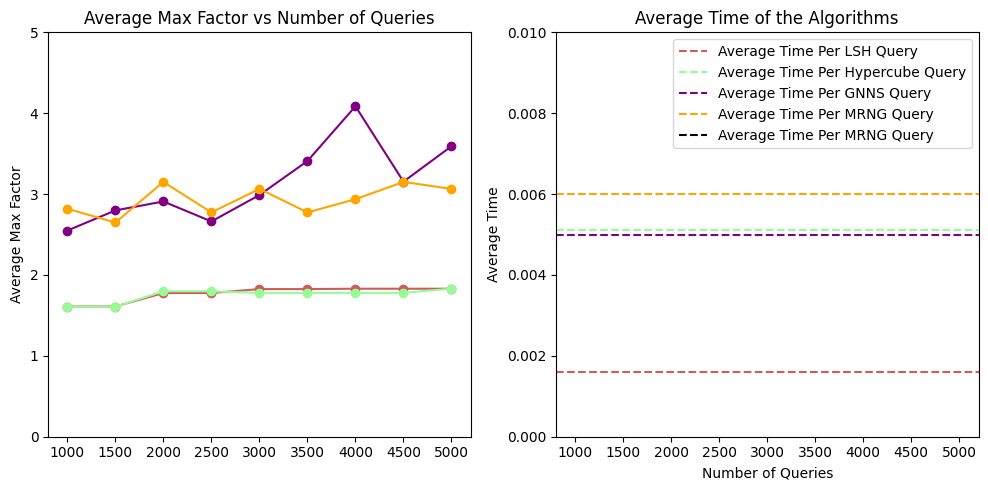

In [104]:
import matplotlib.pyplot as plt

# Data
q_values = [1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]

lsh_max_factors = [1.609474, 1.609474,
                  1.776416, 1.776416,
                  1.825386, 1.825386,
                  1.829789, 1.829789,
                  1.829789]
                     
cube_max_factors = [1.606468, 1.606468, 
                   1.798223, 1.798223, 
                   1.778564, 1.778564,
                   1.778564, 1.778564,
                   1.830460]

gnns_max_factors = [2.548782, 2.798385, 
                    2.908510, 2.661825, 
                    2.988150, 3.408704, 
                    4.085710, 3.153726, 
                    3.592235]

mrng_max_factors = [2.818301, 2.648803, 
                    3.150275, 2.773352, 
                    3.064597, 2.773352, 
                    2.936895, 3.150275, 
                    3.064597]

                    
avg_time_lsh = 0.0016
avg_time_cube = 0.0051
avg_time_gnns = 0.0050
avg_time_mrng = 0.0060
avg_time_exhaust = 0.050  # Rounded up value for AverageTimePerExhaustQuery

# Creating subplots
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(10, 5))

# Plotting Number of Queries vs MaxFactor
ax1.plot(q_values , lsh_max_factors, marker='o', linestyle='-', color='indianred')
ax1.plot(q_values , cube_max_factors, marker='o', linestyle='-', color='palegreen')
ax1.plot(q_values , gnns_max_factors, marker='o', linestyle='-', color='purple')
ax1.plot(q_values , mrng_max_factors, marker='o', linestyle='-', color='orange')

ax1.set_ylabel('Average Max Factor')
ax1.set_title('Average Max Factor vs Number of Queries') 
ax1.set_ylim(0.0, 5)

# Plotting AverageTimePerApproxQuery
ax2.axhline(y=avg_time_lsh, linestyle='--', color='indianred', label='Average Time Per LSH Query')
ax2.axhline(y=avg_time_cube, linestyle='--', color='palegreen', label='Average Time Per Hypercube Query')
ax2.axhline(y=avg_time_gnns, linestyle='--', color='purple', label='Average Time Per GNNS Query')
ax2.axhline(y=avg_time_mrng, linestyle='--', color='orange', label='Average Time Per MRNG Query')
ax2.axhline(y=avg_time_exhaust, linestyle='--', color='black', label='Average Time Per MRNG Query')



ax2.set_title('Average Time of the Algorithms')
ax2.set_xlabel('Number of Queries')
ax2.set_ylabel('Average Time')
ax2.set_ylim(0.0, 0.01)
ax2.legend()

# Adjust layout for better spacing
plt.tight_layout()

# Display the subplots
plt.show()

# Conclusions
In the conducted tests, Locality-Sensitive Hashing (LSH) emerged as the obviously superior algorithm, showcasing the highest level of performance. Similar results were achieved with the Hypercube algorithm, which, although slightly slower, demonstrated a good level of accuracy.

On the other hand, the Graph algorithms, namely GNNS and MRNG, even though initally their results seems satisfactory, a notable drawback surfaced in their inconsistency when confronted with edge cases. Despite their general efficacy, these algorithms need to resort to brute force speeds to maintain accuracy. In this context, MRNG outperformed GNNS, displaying a marginally better performance, albeit with a noticeable increase in computational overhead.

In conclusion, while LSH stands out as the optimal choice in terms of overall performance, the Hypercube algorithm provides a viable alternative with a negligible sacrifice in speed. The Graph algorithms, while proficient in many cases, struggle with edge cases and resort to less efficient methods, with MRNG showing a slight edge in performance despite its overhead. 

But of course we can't think of those results independently of the particular dataset (MNIST) and metric (Eucledean), both of which might be indirectly putting the graph searches at a disadvantage. 